In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
dados = pd.read_csv('covid19-morocco.csv') #declarar o dataset

In [3]:
dados.head() #ler dataset

,date,total_cases,recovered,active_cases,total_deaths
0,2020-02-15,0,0,0,0
1,2020-02-16,0,0,0,0
2,2020-02-17,0,0,0,0
3,2020-02-18,0,0,0,0
4,2020-02-19,0,0,0,0


In [4]:
dados.tail() #ler dataset

,date,total_cases,recovered,active_cases,total_deaths
335,2021-01-15,457625,432576,17161,7888
336,2021-01-16,458865,433937,17017,7911
337,2021-01-17,459671,434925,16804,7942
338,2021-01-18,460144,435686,16481,7977
339,2021-01-19,461390,436626,16753,8011


# Começo do metodo de gráficos

In [5]:
dados_casos_ativos= dados.groupby('date', sort=False).agg({ 'active_cases': np.sum }).reset_index() #agrupar dados da coluna dados e da coluna casos ativos, para criação de grafico de barras

In [6]:
dados_casos_ativos #relembrar/puxar dados do dataset

,date,active_cases
0,2020-02-15,0
1,2020-02-16,0
2,2020-02-17,0
3,2020-02-18,0
4,2020-02-19,0
...,...,...
335,2021-01-15,17161
336,2021-01-16,17017
337,2021-01-17,16804
338,2021-01-18,16481


In [7]:
px.bar(dados_casos_ativos, x='date', y='active_cases') #utilizando metodo bar para criar o grafico utilizando apenas as colunas "date" e "active_cases"

In [8]:
dados_casos_ativos_data_e_total_mortos = dados.groupby(['date', 'active_cases'], sort=False).agg({ 'total_deaths': np.sum }).reset_index() #agrupar dados da coluna dados da coluna casos ativos e da coluna total mortos

In [9]:
dados_casos_ativos_data_e_total_mortos #puxando os dados do dataset

,date,active_cases,total_deaths
0,2020-02-15,0,0
1,2020-02-16,0,0
2,2020-02-17,0,0
3,2020-02-18,0,0
4,2020-02-19,0,0
...,...,...,...
335,2021-01-15,17161,7888
336,2021-01-16,17017,7911
337,2021-01-17,16804,7942
338,2021-01-18,16481,7977


In [10]:
px.bar(dados_casos_ativos_data_e_total_mortos, x='date', y='active_cases', color='total_deaths', barmode='group')#utilizando metodo bar para criar o grafico utilizando apenas as colunas "date", "active_cases", "total_deaths" com metodo de coloração

In [11]:
px.bar(dados_casos_ativos_data_e_total_mortos, x='active_cases', y='date', color='total_deaths', barmode='group', orientation='h')#utilizando metodo bar para criar o grafico utilizando apenas as colunas "date", "active_cases", "total_deaths" com metodo de coloração e mudando o estilo para horizontal

In [12]:
px.scatter(dados, x='active_cases', y='total_cases', color='date', hover_name='total_deaths') # alterando o estilo do grafico para grafico de dispersão utilizando todas a colunas do dataset

In [13]:
dados.head()

,date,total_cases,recovered,active_cases,total_deaths
0,2020-02-15,0,0,0,0
1,2020-02-16,0,0,0,0
2,2020-02-17,0,0,0,0
3,2020-02-18,0,0,0,0
4,2020-02-19,0,0,0,0


<ipython-input-14-d84022bca4c1>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




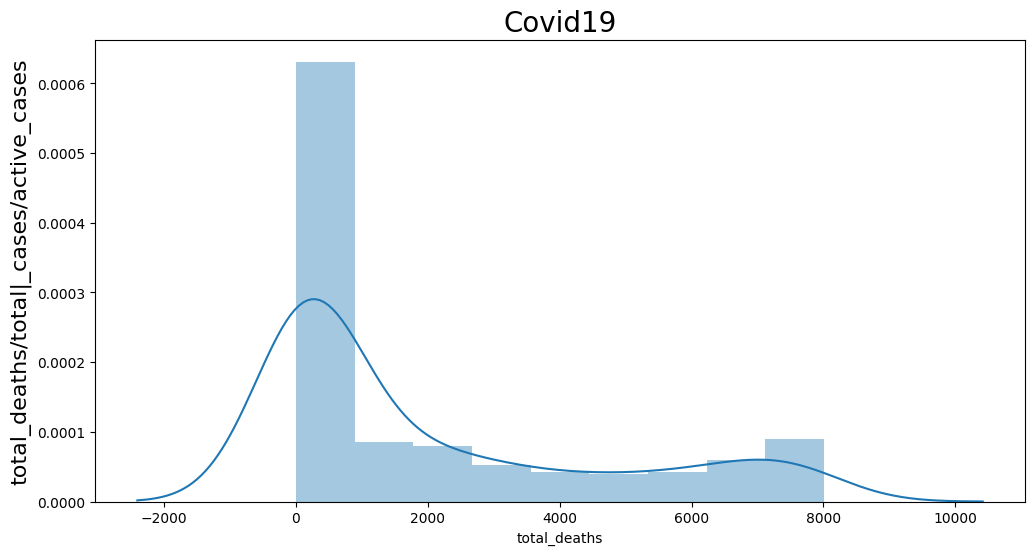

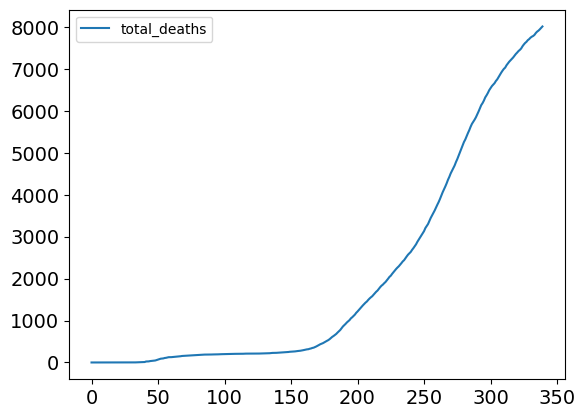

In [14]:
# Gerando um histograma para a coluna "Covid19"
ax = sns.distplot(dados['total_deaths'])

ax.figure.set_size_inches(12, 6)
ax.set_title('Covid19', fontsize=20)
ax.set_ylabel('total_deaths/total|_cases/active_cases', fontsize=16)

ax = dados[['total_deaths']].plot(fontsize=14)

# Começo do modelo de classificação

In [15]:
dados.drop('recovered', axis=1, inplace=True)
dados

,date,total_cases,active_cases,total_deaths
0,2020-02-15,0,0,0
1,2020-02-16,0,0,0
2,2020-02-17,0,0,0
3,2020-02-18,0,0,0
4,2020-02-19,0,0,0
...,...,...,...,...
335,2021-01-15,457625,17161,7888
336,2021-01-16,458865,17017,7911
337,2021-01-17,459671,16804,7942
338,2021-01-18,460144,16481,7977


In [16]:
dados.drop('date', axis=1, inplace=True)
dados

,total_cases,active_cases,total_deaths
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
335,457625,17161,7888
336,458865,17017,7911
337,459671,16804,7942
338,460144,16481,7977


In [17]:
# Seleção de features (entradas)
X = dados.iloc[:,:-1].values #Valores (features)
X

array([[     0,      0],
       [     0,      0],
       [     0,      0],
       [     0,      0],
       [     0,      0],
       [     0,      0],
       [     0,      0],
       [     0,      0],
       [     0,      0],
       [     0,      0],
       [     0,      0],
       [     0,      0],
       [     0,      0],
       [     0,      0],
       [     0,      0],
       [     0,      0],
       [     1,      1],
       [     1,      1],
       [     1,      1],
       [     2,      2],
       [     2,      2],
       [     2,      2],
       [     2,      2],
       [     2,      2],
       [     3,      2],
       [     6,      5],
       [     6,      5],
       [     7,      5],
       [    18,     16],
       [    28,     26],
       [    37,     35],
       [    44,     41],
       [    54,     51],
       [    63,     59],
       [    86,     81],
       [    96,     90],
       [   115,    108],
       [   143,    134],
       [   170,    159],
       [   225,    212],


In [18]:
y = dados['total_deaths'] #Espécies (labels)
y

0         0
1         0
2         0
3         0
4         0
       ... 
335    7888
336    7911
337    7942
338    7977
339    8011
Name: total_deaths, Length: 340, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)

In [20]:
X_train.shape

(272, 2)

In [21]:
X_test.shape

(68, 2)

In [22]:
SVC_model = SVC()
SVC_model.fit(X_train, y_train)

SVC()

In [23]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
SVC_prediction = SVC_model.predict(X_test)

In [25]:
SVC_prediction

array([   0, 2685,    0, 7581,    0, 7888, 7130, 7314, 7942,    0,    0,
       3572,    0,    0,    0, 2726, 4779,    0,    0,    0,    0,    0,
       6245,    0,    0, 7452,    0,  242,    0,    0,    0,    0, 2928,
       7685,    0,    0,    0, 3301, 3826,    0,    0,    0, 4059,    0,
          0,    0,    0,  208,    0,    0,    0,    0, 4356, 7314,    0,
          0,    0,    0, 2928,    0,    0,    0,    0, 7086, 7314,    0,
          0, 2605])

In [26]:
KNN_prediction = KNN_model.predict(X_test)
KNN_prediction

array([ 955, 2330,    0, 7388, 1648, 7767, 7000, 7130, 7810,    0,  264,
       3506,  212, 1329,    0, 2605, 4570,  192,    0, 1078, 1111,  208,
       6136,    0, 1111, 7388,  611, 2293,    0,  193,  111,  188, 2685,
       7581,    0,  255,  186, 3205, 3695,    1,  127, 1553, 3982,  202,
        242,    0,  188, 2113,  158,  276,    3,  168, 4059, 7130,  145,
          0,  212,  135, 2726,    3,  327,   25, 1329, 6909, 7086,  190,
        212, 2410])

In [27]:
acuracia_svc = (accuracy_score(SVC_prediction, y_test)*100)

In [28]:
print(f'Acurácia do modelo SVC: {acuracia_svc: .2f} %')

Acurácia do modelo SVC:  13.24 %


In [29]:
acuracia_knn = (accuracy_score(KNN_prediction, y_test)*100)

In [30]:
print(f'Acurácia do modelo KNN: {acuracia_knn: .2f} %')

Acurácia do modelo KNN:  22.06 %


# Começo do modelo do regressão linear


In [31]:
# Variável dependente y
y2 = dados['total_deaths']
y2

0         0
1         0
2         0
3         0
4         0
       ... 
335    7888
336    7911
337    7942
338    7977
339    8011
Name: total_deaths, Length: 340, dtype: int64

In [32]:
X2 = dados[['total_cases', 'active_cases']]
X2

,total_cases,active_cases
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
335,457625,17161
336,458865,17017
337,459671,16804
338,460144,16481


In [33]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
X2_train

,total_cases,active_cases
322,442141,22521
31,44,41
242,160333,23648
234,137248,19484
163,20887,4018
...,...,...
188,49247,14231
71,4065,3311
106,7807,2143
270,270626,44377


In [34]:
X2_test.shape

(102, 2)

In [35]:
modelo = LinearRegression()

In [36]:
modelo.fit(X2_train, y2_train)

LinearRegression()

In [37]:
y2_previsto = modelo.predict(X2_test)

In [38]:
y2_previsto

array([5597.20844737,  197.83988485,  193.32398797,   61.39392978,
        217.8374203 , 2208.53716623,  680.23396666, 5164.86114684,
       7809.29630936,   56.07621168,  207.12139432, 1819.54087453,
       3750.13826348,  341.15058421,  187.40634686,  509.00485242,
        199.38586159, 7550.06714833, 4178.72975453,   55.99384892,
       5322.84082928,   75.82212543,  415.1275209 ,  200.76501114,
        294.60346246,  157.08514873,  184.87740138, 1425.27592113,
        266.67650305, 7225.35195273,  584.38077776,   58.98590274,
        178.38637137, 7300.61564063,  126.43023561,   55.99384892,
       6617.43117037, 7658.5089748 ,  189.76944982,  120.65393842,
        143.67078742,   55.99384892,  353.50460637, 2085.60481753,
         64.8098169 , 7272.90240462, 5750.02161007, 6380.44022649,
        115.28505462,   56.83304268, 7398.06558682,  707.1630451 ,
       1190.7689429 ,  137.81619988,   92.86497751, 1045.5530616 ,
         78.86619802, 7701.94634503, 7773.08466715,   64.29468

In [39]:
print(f'R² = {modelo.score(X2_train, y2_train).round(2)}')

R² = 1.0


In [40]:
print(f'R² = {metrics.r2_score(y2_test, y2_previsto).round(2)}')

R² = 1.0


# Salvando modelo para API

In [41]:
import pickle
modelo_treinado = modelo
nome_arquivo_pickle = 'modelo_treino.pkl'
with open(nome_arquivo_pickle, 'wb') as arquivo:
    pickle.dump(modelo_treinado, arquivo)